In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [100]:
df=pd.read_csv('titanic.csv')

In [101]:
target=df.Survived

In [102]:
d=df

In [103]:
d

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [104]:
X=d.drop(['Embarked','Fare','Name','Survived','PassengerId','Parch','SibSp'],axis='columns',inplace=True)

In [105]:
X

In [106]:
d

,Pclass,Sex,Age,Ticket,Cabin
0,3,male,22.0,A/5 21171,NaN
1,1,female,38.0,PC 17599,C85
2,3,female,26.0,STON/O2. 3101282,NaN
3,1,female,35.0,113803,C123
4,3,male,35.0,373450,NaN
...,...,...,...,...,...
886,2,male,27.0,211536,NaN
887,1,female,19.0,112053,B42
888,3,female,NaN,W./C. 6607,NaN
889,1,male,26.0,111369,C148


In [107]:
X=d

In [108]:
X.drop(['Cabin'],axis='columns',inplace=True)

In [109]:
X

,Pclass,Sex,Age,Ticket
0,3,male,22.0,A/5 21171
1,1,female,38.0,PC 17599
2,3,female,26.0,STON/O2. 3101282
3,1,female,35.0,113803
4,3,male,35.0,373450
...,...,...,...,...
886,2,male,27.0,211536
887,1,female,19.0,112053
888,3,female,NaN,W./C. 6607
889,1,male,26.0,111369


In [110]:
dummies=pd.get_dummies(df.Sex,dtype='int')

In [111]:
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [112]:
merged=pd.concat([X,dummies],axis='columns')

In [113]:
merged.head(10)

,Pclass,Sex,Age,Ticket,female,male
0,3,male,22.0,A/5 21171,0,1
1,1,female,38.0,PC 17599,1,0
2,3,female,26.0,STON/O2. 3101282,1,0
3,1,female,35.0,113803,1,0
4,3,male,35.0,373450,0,1
5,3,male,NaN,330877,0,1
6,1,male,54.0,17463,0,1
7,3,male,2.0,349909,0,1
8,3,female,27.0,347742,1,0
9,2,female,14.0,237736,1,0


In [114]:
inputs=merged.drop(['Ticket','Pclass'],axis='columns',inplace=True)

In [115]:
merged

,Sex,Age,female,male
0,male,22.0,0,1
1,female,38.0,1,0
2,female,26.0,1,0
3,female,35.0,1,0
4,male,35.0,0,1
...,...,...,...,...
886,male,27.0,0,1
887,female,19.0,1,0
888,female,NaN,1,0
889,male,26.0,0,1


In [116]:
inputs=merged

In [117]:
inputs

,Sex,Age,female,male
0,male,22.0,0,1
1,female,38.0,1,0
2,female,26.0,1,0
3,female,35.0,1,0
4,male,35.0,0,1
...,...,...,...,...
886,male,27.0,0,1
887,female,19.0,1,0
888,female,NaN,1,0
889,male,26.0,0,1


In [118]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [119]:
inputs['Age']=inputs['Age'].fillna(inputs['Age'].mean())

In [120]:
inputs.drop(['Sex'],axis='columns',inplace=True)

In [121]:
i=inputs[inputs.duplicated()]

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
model=GaussianNB()

In [129]:
model.fit(X_train,y_train)

GaussianNB()

In [137]:
y_predi=model.predict(X_test)

In [138]:
model.score(X_test,y_test)

0.7597765363128491

In [139]:
model.predict_proba(X_test[:10])

array([[0.01538771, 0.98461229],
       [0.96276384, 0.03723616],
       [0.96329731, 0.03670269],
       [0.95191782, 0.04808218],
       [0.01536584, 0.98463416],
       [0.01446806, 0.98553194],
       [0.95835686, 0.04164314],
       [0.95709205, 0.04290795],
       [0.93522408, 0.06477592],
       [0.96324621, 0.03675379]])

In [140]:
y_test

215    1
663    0
817    0
714    0
241    1
      ..
59     0
406    0
244    0
695    0
573    1
Name: Survived, Length: 179, dtype: int64

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
cm=confusion_matrix(y_test,y_predi)

In [144]:
cm

array([[92, 15],
       [28, 44]])

<Axes: >

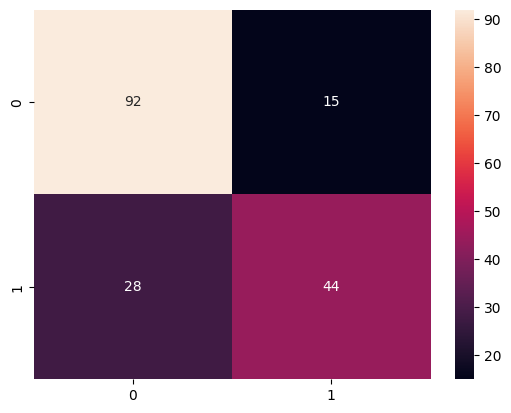

In [145]:
import seaborn as sn
sn.heatmap(cm,annot=True)

['lub']